# Random Forest Classifier with Pipline and Hyperperamater Tuning

# Problem Statment 
### We need to predict the time i.e Dinner time or Lunch time


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

In [ ]:
# Load tips dataset from sns library
df = pd.read_csv('../Dataset/tips.csv')

OSError: [Errno 22] Invalid argument: 'Dataset\tips.csv'

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder =LabelEncoder()

In [ ]:
df['time'] = encoder.fit_transform(df['time'])

In [ ]:
df['time'].unique()

array([0, 1])

In [ ]:
df['time'].value_counts()

time
0    176
1     67
Name: count, dtype: int64

# Independent and Dependent Feature

In [ ]:
# Indpenedent Feature
X = df.drop(columns=['time'], axis= 1)

In [ ]:
# Dependent Feature
y= df['time']

In [ ]:
X.shape

(243, 6)

In [ ]:
X.head()

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4


In [ ]:
y.shape

(243,)

# train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.20 , random_state=42)

# Pipline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.impute import SimpleImputer
# To handle missing values

In [ ]:
from sklearn.preprocessing import StandardScaler # Feature Scaling
from sklearn.preprocessing import OneHotEncoder  # Categorical to numerical

In [ ]:
from sklearn.compose import ColumnTransformer
# To Combine multiple Piplines

In [ ]:
categorical_cols = ['sex', 'smoker','day']
numrical_cols = ['total_bill','tip', 'size']

In [ ]:
# X.columns(X.select_dtypes(exclude='object'))

In [ ]:
""" We will create seperate pipline for numrical and categorical columns"""

' We will create seperate pipline for numrical and categorical columns'

# Numerical Pipline

In [ ]:
num_pipline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

# Categorical Pipline

In [ ]:
cat_pipline = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehotencoder',OneHotEncoder())
    ]
)

In [ ]:
# Above is Feature Engineering Automation

# Combining Both Pipline

# ColumnTransformer
## - Use to comebine multiple piplines

In [ ]:
preprocssor = ColumnTransformer([
    ('num_pipline', num_pipline,numrical_cols), # we pass numrical_cols as to num_pipline
    ('cat_pipline', cat_pipline , categorical_cols) # stepName , piplineName , columns on which we have to apply

]
)

In [ ]:
# preprocssor.fit_transform(X_train)

In [ ]:
X_train = preprocssor.fit_transform(X_train)

In [ ]:
X_test = preprocssor.fit_transform(X_test)

# Model Training Automation


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
models = {
    'Random Forest':RandomForestClassifier(),
    'Logistic Regression':LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# i will write a fun which will understand you 

In [ ]:
# def evaluate_model(X_train , y_train, X_test, y_test , models):
#     report ={}
#     for i in range(len(models)):
#         model = list(models.values())[i] #  models.values() return a list of value and through [i] we get the ith value from the list of values 
#         # train the model
#         model.fit(X_train, y_train)

#         # Predict Testing Data
#         y_test_pred = model.predict(X_test)

#         # Get Accuracy Score for the Test Data Prediction
#         test_model_score = accuracy_score(y_test , y_test_pred)
#         report[list(models.keys())[i]] = test_model_score # models.keys() this will give all the keys in list form and [i] will give the ith key and we assign a value called test_accuracy_score to the ith model
        

#     return report


In [ ]:
# evaluate_model(X_train, y_train, X_test, y_test , models)

{'Random Forest': 1.0,
 'Logistic Regression': 1.0,
 'Decision Tree': 0.9795918367346939}

# 2nd Method 
### - This  method is each and simple so use this one

In [ ]:
def evualvate_model(X_train , y_train , X_test , y_test , models):
    report = {}
    for name, model in models.items():  # name is key and model is value e.g  clf = Logistic Regression so here key is clf and value is Logistic Regression
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        test_model_score = accuracy_score(y_test , y_test_pred)
        report[name] = test_model_score
    return report

In [ ]:
evualvate_model(X_train, y_train, X_test , y_test , models)

{'Random Forest': 0.9795918367346939,
 'Logistic Regression': 1.0,
 'Decision Tree': 0.9795918367346939}

#### As the Logisic Regression is overfitted b/c it's accuracy is 1.0 i.e 100% . So don't go for it

In [ ]:
classifier = RandomForestClassifier()

## Hyperparameter Tuning of RandomForestClassifier

In [ ]:
params = {
    'max_depth':[3,5,10, None],
    'n_estimators':[100,200,300], # No of Decision Trees
    'criterion':['gini','entropy']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
cv = RandomizedSearchCV(classifier, param_distributions=params, scoring= 'accuracy', cv =5 , verbose= 3 )

In [ ]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.949 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.923 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.949 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.923 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.921 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.949 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.923 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.949 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.923 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.921 total time=   0.1s

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [ ]:
cv.best_params_

{'n_estimators': 100, 'max_depth': 3, 'criterion': 'entropy'}

In [ ]:
model = RandomForestClassifier(n_estimators=100 , max_depth=3 , criterion='entropy')

In [ ]:
model.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(f"Accuracy = {accuracy_score(y_test , y_pred)}")

Accuracy = 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
c_matrix = confusion_matrix(y_test , y_pred)
c_matrix

array([[42,  0],
       [ 0,  7]], dtype=int64)

<Axes: >

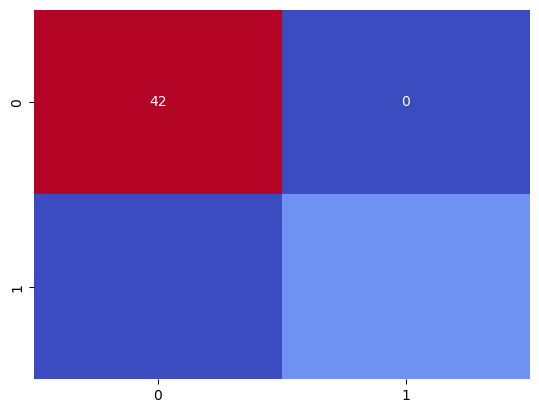

In [ ]:
sns.heatmap(c_matrix, annot=True , cmap='coolwarm', cbar=False)